In [1]:
%matplotlib inline

In [2]:
import csv
import pandas as pd
import numpy as np
import os
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import linregress

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')



In [3]:
# Global declarations
data_path = "..\data"

dataFile = "AvgTempCYear_1.csv"

#Output folders
result_dir = "..\output"
image_dir = "..\images"

# Plot Style to use
mpl.style.use('seaborn')




In [4]:
#read data file
tempDF = pd.read_csv(os.path.join(data_path, dataFile))

tempDF.head()

,Country,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,ALGERIA,1975,8.9,10.3,12.1,16.4,20.7,23.8,28.5,27.8,24.7,18.9,12.8,10.9
1,ALGERIA,1976,8.6,10.6,11.3,15.8,19.7,24.9,27.5,25.0,24.2,19.0,11.7,11.1
2,ALGERIA,1977,11.0,12.4,14.8,16.9,20.0,23.0,28.7,26.0,24.0,19.4,14.0,11.7
3,ALGERIA,1978,9.1,13.1,13.8,16.9,20.0,25.1,28.1,27.8,24.8,17.8,12.6,12.9
4,ALGERIA,1979,13.0,12.1,14.4,15.0,21.0,26.5,29.3,29.2,23.8,20.0,11.5,10.2


In [5]:
#check for missing values
print(f"Missing values total - {tempDF.isnull().values.sum()}")

#mising rows
nullRows = tempDF[tempDF.isnull().any(axis = 1)]

print(f"Number of rows ith missing data : {nullRows.count()}")

nullRows

Missing values total - 1709
Number of rows ith missing data : Country    644
Year       644
Jan        505
Feb        507
Mar        520
Apr        524
May        516
Jun        530
Jul        511
Aug        499
Sep        514
Oct        504
Nov        499
Dec        390
dtype: int64


,Country,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
18,ALGERIA,1993,NaN,9.9,13.2,16.9,21.5,27.0,29.0,29.3,24.8,20.0,16.2,10.6
43,ALGERIA,2018,10.9,10.4,15.1,18.6,21.4,26.7,32.1,28.8,26.6,20.1,14.7,NaN
76,AMERICAN SAMOA (U.S.A.),2007,28.5,28.7,28.7,28.9,28.2,NaN,28.3,28.4,28.3,28.5,28.7,28.6
77,AMERICAN SAMOA (U.S.A.),2008,28.6,29.0,28.6,NaN,NaN,27.3,NaN,NaN,27.4,28.2,28.5,29.2
78,AMERICAN SAMOA (U.S.A.),2009,29.5,29.7,29.6,NaN,27.7,27.3,27.0,NaN,NaN,27.3,27.4,27.4
79,AMERICAN SAMOA (U.S.A.),2010,29.4,NaN,NaN,28.3,28.2,NaN,NaN,NaN,NaN,NaN,27.2,NaN
80,AMERICAN SAMOA (U.S.A.),2011,NaN,26.8,27.7,28.0,27.4,27.3,27.6,26.8,27.2,27.5,27.1,27.6
83,AMERICAN SAMOA (U.S.A.),2014,NaN,28.5,28.3,27.6,27.6,27.2,26.4,26.7,27.9,28.6,27.6,27.9
87,AMERICAN SAMOA (U.S.A.),2018,27.8,28.0,28.3,27.6,27.7,27.9,26.9,26.7,27.5,27.7,28.1,NaN
131,ANTARCTICA,2018,-3.9,-7.1,-11.6,-13.8,-17.1,-17.2,-19.5,-19.7,-20.1,-15.2,-8.6,NaN


In [6]:
# fill the NA with rowwise means
rowMeans = tempDF[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].mean(axis = 1)
rowMeans

tempDF = tempDF.apply(lambda r: r.fillna(rowMeans[r.index]))

In [7]:
print(f"Missing values total - {tempDF.isnull().values.sum()}")

Missing values total - 0


## START ANALYSIS

In [8]:
# Reshape Temp data, such that months are in rows and data col is added
# USE melt() to change the column-wise months into row-wse data

temp_flatDF = pd.melt(tempDF, id_vars =['Country','Year'], var_name = 'Month', value_name = "Monthly_Temp")

temp_flatDF.head()

,Country,Year,Month,Monthly_Temp
0,ALGERIA,1975,Jan,8.9
1,ALGERIA,1976,Jan,8.6
2,ALGERIA,1977,Jan,11.0
3,ALGERIA,1978,Jan,9.1
4,ALGERIA,1979,Jan,13.0


In [9]:
# Add Date column, example 01-Jan-1975
temp_flatDF['Date'] = temp_flatDF['Year'].astype(str)+'-'+temp_flatDF['Month'].astype(str)+'-01'
temp_flatDF.head()
#temp_flatDF['Date'] = 
temp_flatDF['Date'] = temp_flatDF['Date'].apply(lambda r: datetime.strptime(r , '%Y-%b-%d'))

temp_flatDF.dtypes

Country                 object
Year                     int64
Month                   object
Monthly_Temp           float64
Date            datetime64[ns]
dtype: object

### Roll up averages to global level for temp

In [10]:
# Group by year and month and aggregate values by mean()

temp_GDF_YM = temp_flatDF.groupby(['Year','Month','Date']).agg(np.mean)

temp_GDF_YM.reset_index(inplace = True)

temp_GDF_YM.head()


,Year,Month,Date,Monthly_Temp
0,1975,Apr,1975-04-01,16.607500
1,1975,Aug,1975-08-01,20.945000
2,1975,Dec,1975-12-01,12.039167
3,1975,Feb,1975-02-01,12.323333
4,1975,Jan,1975-01-01,12.086667


In [11]:
# Group by year aggregate values by mean()

temp_GDF_Y = temp_flatDF[['Year','Monthly_Temp']].groupby(['Year']).agg(np.mean)

temp_GDF_Y.reset_index(inplace = True)

temp_GDF_Y.head()

,Year,Monthly_Temp
0,1975,16.579987
1,1976,16.183403
2,1977,16.635145
3,1978,16.402431
4,1979,16.601778


## Perform Regression Analysis - Yearly Temp Average

In [16]:
#
# Set line
x_axis = temp_GDF_Y['Year']
y_axis = temp_GDF_Y['Monthly_Temp'] 
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(f"Slope of the regression line is {slope}")
print(f"p-Value of the regression line is {p_value}")

Slope of the regression line is 0.03398442509468291
p-Value of the regression line is 2.0170408157315455e-19


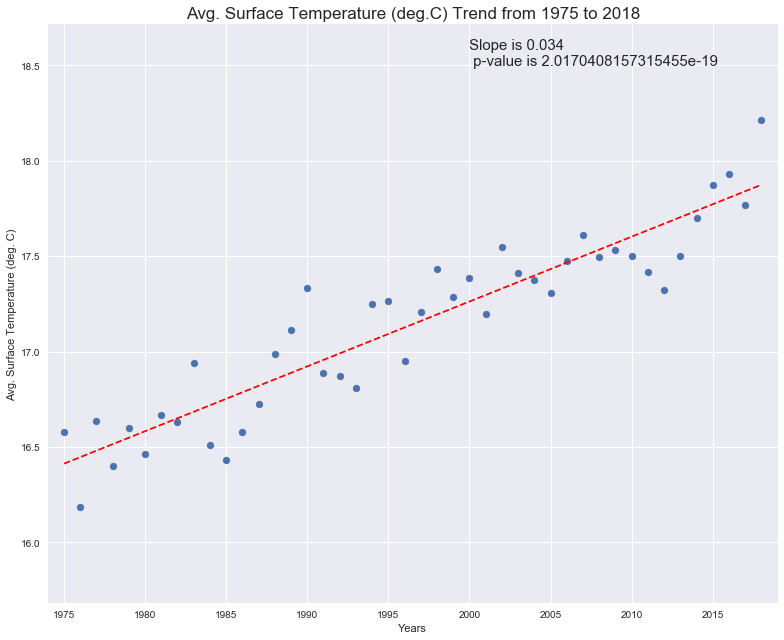

In [19]:
# Plot a simple timeseries plot
fig,ax = plt.subplots(figsize = (11,9))

ax.scatter(x_axis, y_axis)
ax.plot(x_axis, fit, 'r--')

ax.set_xlim(x_axis.min()-1, x_axis.max()+1)
ax.set_ylim(y_axis.min()-0.5, y_axis.max()+0.5)

ax.set_xlabel("Years", fontsize = 11)
ax.set_ylabel("Avg. Surface Temperature (deg. C)", fontsize = 11)

ax.set_title(f"Avg. Surface Temperature (deg.C) Trend from {min(x_axis)} to {max(x_axis)}", fontsize = 17)

ax.text(2000,18.5, f"Slope is {round(slope, 4)} \n p-value is {p_value}", fontsize = 15)

plt.tight_layout()

plt.savefig(os.path.join(image_dir, "AvgTemp_regressFit.png"))

plt.show()

### ANNOVA  Test to prove "Surface temp has risen more 0.5 degC since 1975"

4 groups are created 1975 - 1985, 1986 - 1996, 1997 - 2007, 2008 - 2017

In [ ]:
# Create four Bins of Temp over years
bins = [1974, 1986, 1997, 2008,  2018]

# Create the names for the four bins
group_names = ["1975 - 1985", "1986 - 1996", "1997 - 2007", "2008 - 2017"]

In [ ]:
temp_GDF_Y['TempGrps'] = pd.cut(temp_GDF_Y['Year'], bins, labels = group_names)

temp_GDF_Y.head()

In [ ]:
# Create a boxplot to see the difference in the mean
fig = temp_GDF_Y.boxplot("Monthly_Temp", by="TempGrps", figsize=(14, 10))

plt.xlabel("Year Groups", fontsize = 12)
plt.ylabel("Avg. Surface Temperature (deg. C)", fontsize = 12)

plt.title(f"Box Plot of Avg. Surface Temperature (deg.C) for Year Group from {min(x_axis)} to {max(x_axis)}", \
         fontsize = 17)

plt.suptitle("")

plt.tight_layout()

plt.savefig(os.path.join(image_dir, "AvgTemp_boxPlot.png"))

plt.show()

### Create groups for ANNOVA analysis

In [ ]:
# Extract individual groups
group1 = temp_GDF_Y[temp_GDF_Y["TempGrps"] == group_names[0]]["Monthly_Temp"]
group2 = temp_GDF_Y[temp_GDF_Y["TempGrps"] == group_names[1]]["Monthly_Temp"]
group3 = temp_GDF_Y[temp_GDF_Y["TempGrps"] == group_names[2]]["Monthly_Temp"]
group4 = temp_GDF_Y[temp_GDF_Y["TempGrps"] == group_names[3]]["Monthly_Temp"]


In [ ]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)